<a href="https://colab.research.google.com/github/shfaizan/GenAI/blob/main/Assignment_1_Faizan_Shaikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1:

## Q-1 Find the percentage of major colors in an image.



### Step 1: Import the libraries

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

### Define a function to get major colors from an image:

def get_major_colors(image_path, num_colors=5):: This line defines a function named get_major_colors that takes an image_path as input (the path to the image file) and an optional num_colors parameter (default value is 5).

image = Image.open(image_path): This line opens the image file located at image_path using the PIL (Python Imaging Library) Image.open() function.

pixels = list(image.getdata()): This line retrieves the pixel data of the image using the getdata() method of the image object. It converts the pixel data into a list.

color_count = {}: This line initializes an empty dictionary named color_count to store the count of each color in the image.

total_pixels = len(pixels): This line calculates the total number of pixels in the image by taking the length of the pixels list.

The following loop iterates over each pixel in the pixels list:

If the pixel is already in the color_count dictionary, its count is incremented.
If the pixel is not in the dictionary, it is added with a count of 1.
sorted_colors = sorted(color_count.items(), key=lambda x: x[1], reverse=True): This line sorts the items (color-count pairs) in the color_count dictionary based on the count (value) in descending order.

The loop for color, count in sorted_colors[:num_colors]: iterates over the first num_colors items in the sorted list of color-count pairs:

It extracts the color and its corresponding count.
It calculates the percentage of pixels for each color and appends them to the major_colors and percentages lists, respectively.
Finally, the function returns the lists major_colors and percentages, which contain the major colors and their corresponding percentages in the image, respectively.

In [4]:
def get_major_colors(image_path, num_colors=5):
    image = Image.open(image_path)
    pixels = list(image.getdata())

    color_count = {}
    total_pixels = len(pixels)

    for pixel in pixels:
        if pixel in color_count:
            color_count[pixel] += 1
        else:
            color_count[pixel] = 1

    sorted_colors = sorted(color_count.items(), key=lambda x: x[1], reverse=True)

    major_colors = []
    percentages = []

    for color, count in sorted_colors[:num_colors]:
        major_colors.append(color)
        percentages.append(count / total_pixels * 100)

    return major_colors, percentages

### Define a function to generate a bar graph:

In [5]:
def generate_bar_graph(colors, percentages):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(colors)), percentages, color=[(r / 255, g / 255, b / 255) for (r, g, b) in colors])
    plt.xlabel('Color')
    plt.ylabel('Percentage')
    plt.title('Major Colors in Image')
    plt.xticks(range(len(colors)), ['Color {}'.format(i+1) for i in range(len(colors))])
    plt.show()



### Main block to execute the program:

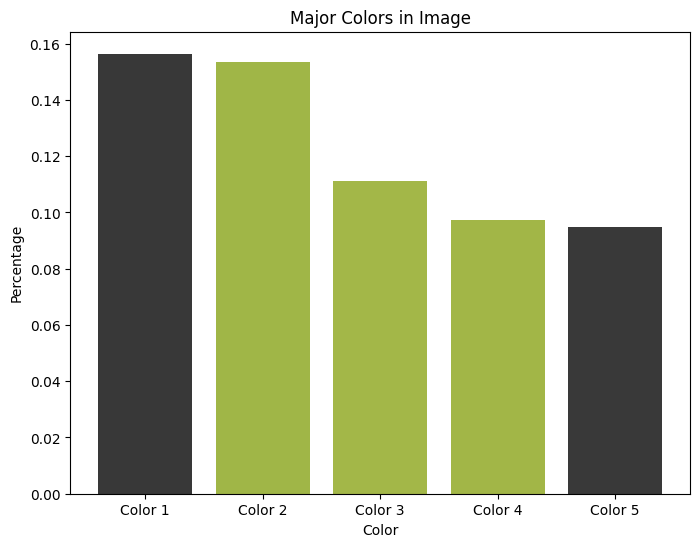

In [6]:
if __name__ == "__main__":
    image_path = "cat.jpeg"  # we can replace this with the path to our image
    num_colors = 5  # We can adjust the number of major colors to consider

    colors, percentages = get_major_colors(image_path, num_colors)
    generate_bar_graph(colors, percentages)


This code calculates the major colors in an image along with their respective percentages and generates a bar graph representing this information. It uses the Python Imaging Library (PIL) to manipulate images and the Matplotlib library to create the bar graph.

## Q-2 Derive similarity score between two sentences applying three different techniques.

### Importing necessary libraries

In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.metrics import jaccard_distance
from nltk import edit_distance

### Method 1: Cosine Similarity

For cosine similarity, we first vectorize the sentences using CountVectorizer, then compute the cosine similarity between the vectors.

In [9]:
def cosine_similarity_score(sentence1, sentence2):
    vectorizer = CountVectorizer().fit_transform([sentence1, sentence2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

### Method 2: Jaccard similarity

For Jaccard similarity, we tokenize the sentences into words, then compute the Jaccard distance, and finally subtract it from 1 to get the similarity.

In [10]:
def jaccard_similarity_score(sentence1, sentence2):
    words1 = set(sentence1.split())
    words2 = set(sentence2.split())
    return 1 - jaccard_distance(words1, words2)

### Method 3: Levenshtein similarity

For Levenshtein similarity, we simply compute the Levenshtein distance between the two sentences, normalize it by the maximum length of the sentences, and subtract it from 1 to get the similarity score.

In [11]:
def levenshtein_similarity_score(sentence1, sentence2):
    return 1 - edit_distance(sentence1, sentence2) / max(len(sentence1), len(sentence2))

### Main block to test the code

In [17]:
if __name__ == "__main__":
    sentence1 = "the cat is on the mat"
    sentence2 = "the mat is under the cat"

    cosine_sim = cosine_similarity_score(sentence1, sentence2)
    jaccard_sim = jaccard_similarity_score(sentence1, sentence2)
    levenshtein_sim = levenshtein_similarity_score(sentence1, sentence2)

    # Calculate average similarity
    average_similarity = (cosine_sim + jaccard_sim + levenshtein_sim) / 3

    # Convert average similarity to percentage
    average_similarity_percentage = int(average_similarity * 100)

    print("Cosine Similarity:", cosine_sim)
    print("Jaccard Similarity:", jaccard_sim)
    print("Levenshtein Similarity:", levenshtein_sim)
    print("Average Similarity:", average_similarity_percentage, "%")

Cosine Similarity: 0.8749999999999999
Jaccard Similarity: 0.6666666666666667
Levenshtein Similarity: 0.75
Average Similarity: 76 %


In [18]:
if __name__ == "__main__":
    sentence1 = "The quick brown fox jumps over the lazy dog"
    sentence2 = "A fast brown fox leaps over a lazy hound"

    cosine_sim = cosine_similarity_score(sentence1, sentence2)
    jaccard_sim = jaccard_similarity_score(sentence1, sentence2)
    levenshtein_sim = levenshtein_similarity_score(sentence1, sentence2)

    # Calculate average similarity
    average_similarity = (cosine_sim + jaccard_sim + levenshtein_sim) / 3

    # Convert average similarity to percentage
    average_similarity_percentage = int(average_similarity * 100)

    print("Cosine Similarity:", cosine_sim)
    print("Jaccard Similarity:", jaccard_sim)
    print("Levenshtein Similarity:", levenshtein_sim)
    print("Average Similarity:", average_similarity_percentage, "%")

Cosine Similarity: 0.45584230583855173
Jaccard Similarity: 0.2857142857142857
Levenshtein Similarity: 0.5813953488372092
Average Similarity: 44 %


As mentinon in the requirement I have completed the first two parts of this week's assignment.